# Programming for AI Lab 10 (Web Scraping 2)

### Rename the file and write your name and roll number in the cells below

# Student Name: Fahad Baig
# Student ID: I191883

# Lab 10 Task (Real World Problem)

### Suppose I am interested in buying a tesla but i would like to perform some market research first.
### I know that any new technology has issues at first which are settled overtime.
### So, I found a website: https://www.bloomberg.com/graphics/2019-tesla-model-3-survey/
### which has a barplot/histogram that shows minor issues and major issues reported overtime
### before making a decision i wanted to scrape the data load it into a pandas dataframe and plot a curve for minor against major issues (Because i dont like histograms)
### But when i tried to scrape the data i found out that the values that i am trying to scrape 
### (e.g Minor Issues = 63.7,Major Issues = 10.0 for Jan 2018 and so on) are being generated dynamically i.e. by javascript and i am not able to see those values in html.

In [1]:
### your code starts here and can take on any number of cells to get the job done.
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
driver = webdriver.Chrome(executable_path=r'C:\Users\FAHAD\Desktop\chromexe\chromedriver.exe')
driver.get('https://www.bloomberg.com/graphics/2019-tesla-model-3-survey/')
time.sleep(7)
####
html = driver.page_source
driver.quit()
####
soup = BeautifulSoup(html, "html.parser")

In [3]:
minors = soup.find('g', class_='series f series-0').find_all('rect', class_='column')
majors = soup.find('g', class_='series f series-1').find_all('rect', class_='column')

In [6]:
major_height = []
minor_height = []
####
for Minor in minors:
    temp = int(str(Minor).split('"')[3])*150/230
    minor_height.append(temp)
####
for Major in majors:
    temp = int(str(Major).split('"')[3])*150/230
    major_height.append(temp)

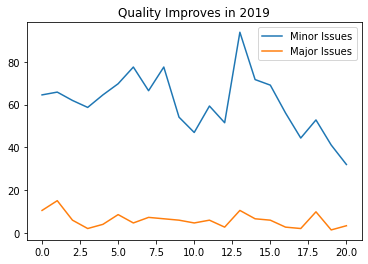

In [5]:
plt.plot(minor_height, label='Minor Issues')
plt.plot(major_height, label='Major Issues')
plt.title('Quality Improves in 2019')
plt.legend()
plt.show()